In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

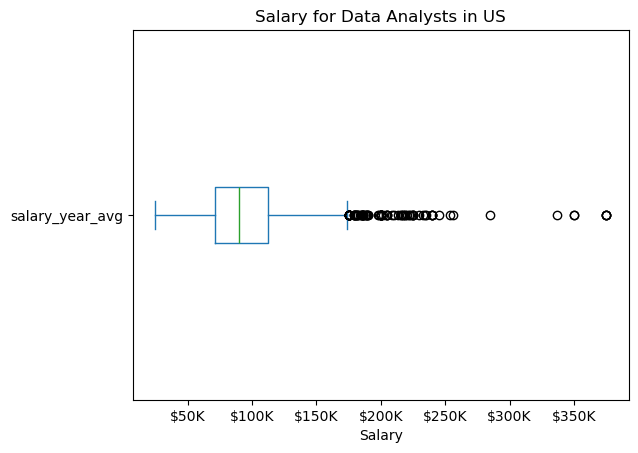

In [14]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title('Salary for Data Analysts in US')
plt.xlabel('Salary')
plt.ylabel('')
plt.show()

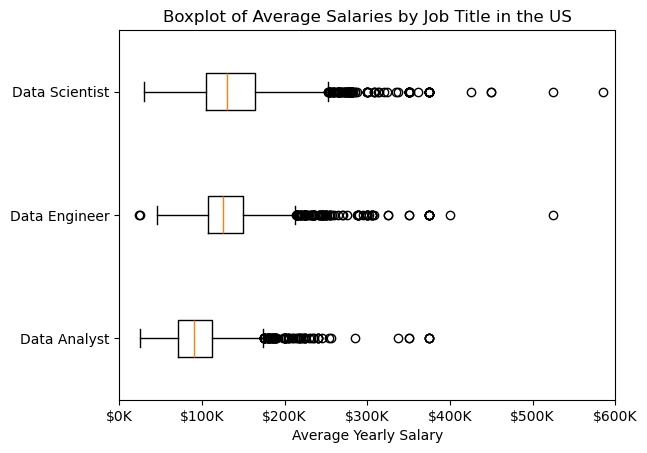

In [25]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US.dropna(subset=['salary_year_avg'], inplace=True)

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'].values for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Average Yearly Salary')
plt.title('Boxplot of Average Salaries by Job Title in the US')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()